In [18]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima #SARIMAX using pmdarima

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

#Import libraries for multicollineaarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import libraries for transformations
import joblib



In [19]:
from SARIMAX import remove_multicollinear, calculate_vif
import datascript
from datascript import load_data, split_data
import os

SARIMAX for Luzon
DATA PREPROCESSING

In [20]:
#Import the necessary files
base_path = os.path.dirname(os.path.abspath(datascript.__file__))  # Gets the current working directory
complete_luzon_transformed = load_data("LUZ", True)
complete_luzon_untransformed = load_data("LUZ", False)


In [28]:
#Prepare exogenous variables and check for multicollinearity
full_transformed_exog = complete_luzon_transformed.drop(columns=['GWAP', 'LWAP'])
full_transformed_exog = full_transformed_exog.shift(1)
full_transformed_exog = full_transformed_exog.fillna(0)
full_exog_train, full_exog_test = split_data(full_transformed_exog, False)

transformed_exog = remove_multicollinear(full_transformed_exog, 10)
calculate_vif(transformed_exog)

Dropping TMIN_Tanay with VIF of 105.37171964773468
Dropping TMAX_Clark with VIF of 86.0108694709832
Dropping TMAX_NAIA with VIF of 77.8066511904131
Dropping TMIN_Clark with VIF of 67.91095869880643
Dropping TMIN_NAIA with VIF of 64.64130040423576
Dropping TMAX_Tayabas with VIF of 61.78433380654503
Dropping TMAX_Ambulong with VIF of 52.70313590076897
Dropping TMIN_Casiguran with VIF of 52.4776503403346
Dropping TMAX_CLSU with VIF of 52.037156877455274
Dropping TMAX_Calapan with VIF of 47.46616180489343
Dropping TMIN_Cubi Point with VIF of 43.12853609439498
Dropping TMAX_Science Garden with VIF of 42.972344209193885
Dropping Demand with VIF of 41.84991857459567
Dropping TMIN_CLSU with VIF of 36.74066662481036
Dropping TMIN_Calapan with VIF of 32.24591602536825
Dropping TMAX_Casiguran with VIF of 30.36894901358221
Dropping TMIN_Ambulong with VIF of 29.033849727048107
Dropping TMAX_Cubi Point with VIF of 25.977176913225104
Dropping TMAX_Tanay with VIF of 20.120304981675517
Dropping TMIN_Ta

,feature,VIF
0,FLOW_LUZ,6.970130
1,Reserve_GWAP_Fr,6.542680
2,Reserve_GWAP_Rd,4.262030
3,Reserve_GWAP_Dr,4.524151
4,RAINFALL_Cubi Point,3.089590
5,RAINFALL_NAIA,3.473194
6,RAINFALL_Science Garden,4.040166
7,TMIN_Science Garden,9.506511
8,RAINFALL_San Jose,2.716155
9,TMIN_San Jose,9.064983


In [22]:
#Prepare the necessary datasets
#Target Variables
train_data, test_data = split_data(complete_luzon_transformed, False)
GWAP_train = train_data['GWAP']
GWAP_test = test_data['GWAP']
LWAP_train = train_data['LWAP']
LWAP_test = test_data['LWAP']

#Exogenous Variables
exog_train, exog_test = split_data(transformed_exog, False)

#Untransformed variables for verification 
untransformed_train_data, untransformed_test_data = split_data(complete_luzon_untransformed, False)
untransformed_GWAP_test = untransformed_test_data['GWAP']
untransformed_LWAP_test = untransformed_test_data['LWAP']



In [23]:
#Plotting Train LWAP ang GWAP
# Create the line plot
gwap_plot = px.line(GWAP_train, x=GWAP_train.index, y='GWAP')
lwap_plot = px.line(LWAP_train, x=LWAP_train.index, y='LWAP')
# Set the title using the ticker value
gwap_plot.update_layout(title=f"Luzon GWAP")
lwap_plot.update_layout(title=f"Luzon LWAP")
# Display the plot
gwap_plot.show()
lwap_plot.show()

Differencing

In [24]:
%run SARIMAX.py

#Checking for stationarity in GWAP data
GWAP_train = perform_differencing(GWAP_train)
LWAP_train = perform_differencing(LWAP_train)

#Perform differencing on train exogenous data
diff_exog_train = perform_df_differencing(exog_train)
diff_exog_train = diff_exog_train.fillna(0)

#Perform differencing on test exogenous data
diff_exog_test = perform_df_differencing(exog_test)
diff_exog_test = diff_exog_test.fillna(0)


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:57: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:57: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\S

Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.
Column 'FLOW_LUZ' is stationary after differencing 0 times.
Column 'Reserve_GWAP_Fr' is stationary after differencing 0 times.
Column 'Reserve_GWAP_Rd' is stationary after differencing 1 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\S

Column 'Reserve_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Cubi Point' is stationary after differencing 0 times.
Column 'RAINFALL_NAIA' is stationary after differencing 1 times.
Column 'RAINFALL_Science Garden' is stationary after differencing 0 times.
Column 'TMIN_Science Garden' is stationary after differencing 1 times.
Column 'RAINFALL_San Jose' is stationary after differencing 0 times.
Column 'TMIN_San Jose' is stationary after differencing 1 times.
Column 'RAINFALL_Tayabas' is stationary after differencing 0 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Column 'RAINFALL_CLSU' is stationary after differencing 1 times.
Column 'RAINFALL_Tanay' is stationary after differencing 1 times.
Column 'RAINFALL_Ambulong' is stationary after differencing 0 times.
Column 'RAINFALL_Casiguran' is stationary after differencing 1 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\S

Column 'RAINFALL_Clark' is stationary after differencing 1 times.
Column 'RAINFALL_Calapan' is stationary after differencing 0 times.
Column 'FLOW_LUZ' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Fr' is stationary after differencing 0 times.
Column 'Reserve_GWAP_Rd' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Cubi Point' is stationary after differencing 2 times.
Column 'RAINFALL_NAIA' is stationary after differencing 2 times.
Column 'RAINFALL_Science Garden' is stationary after differencing 1 times.
Column 'TMIN_Science Garden' is stationary after differencing 1 times.
Column 'RAINFALL_San Jose' is stationary after differencing 1 times.
Column 'TMIN_San Jose' is stationary after differencing 1 times.
Column 'RAINFALL_Tayabas' is stationary after differencing 1 times.
Column 'RAINFALL_CLSU' is stationary after differencing 1 times.
Column 'RAINFALL_Tanay' is stationary after differencing

C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\S

Order Specification

The ACF for GWAP is seen below
The PACF for GWAP is seen below


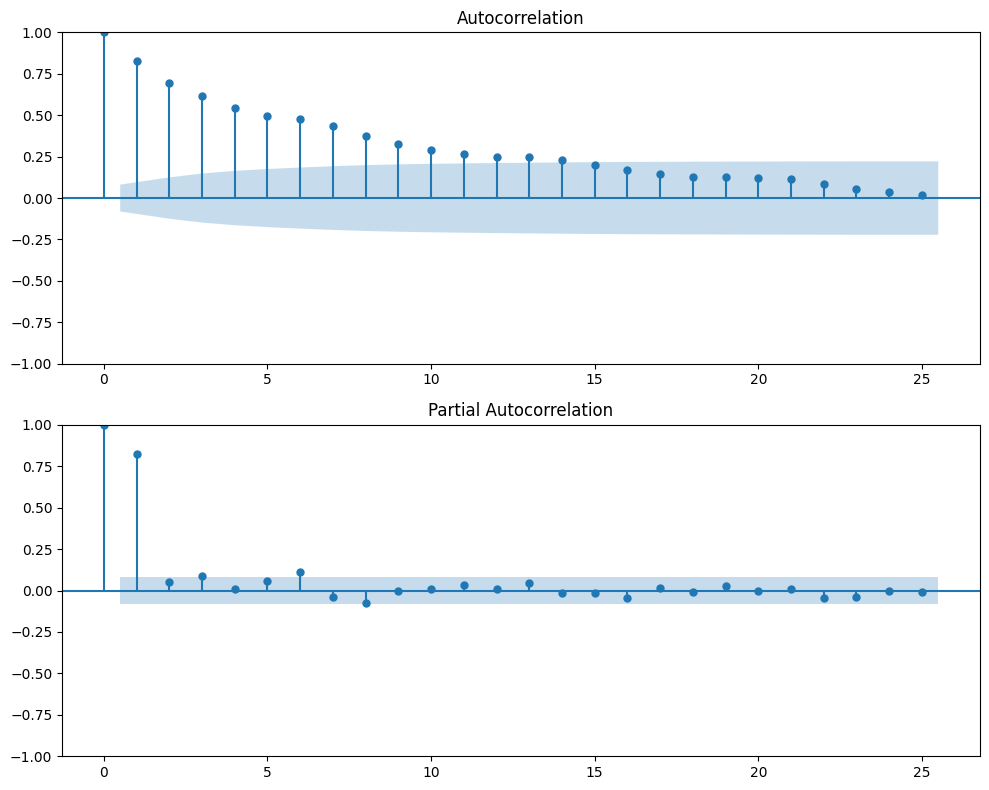

The ACF for LWAP is seen below
The PACF for LWAP is seen below


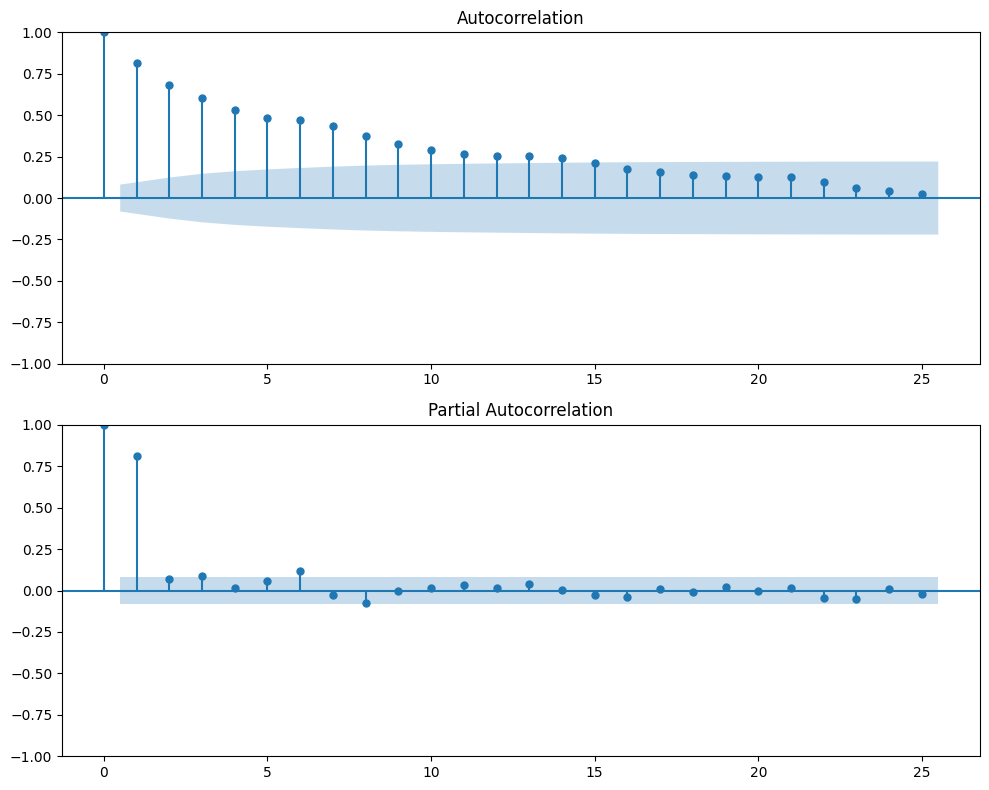

In [25]:
%run SARIMAX.py

plot_orders(GWAP_train, lags=25, alpha=0.05, var='GWAP')
plot_orders(LWAP_train, lags=25, alpha=0.05, var='LWAP')

GWAP and LWAP Forecasting

In [34]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
GWAP_sarimax = seasonal_auto_arima(GWAP_train, max_p=1, max_d=2, max_q=13, exog_data=diff_exog_train )

#Display results of previous function
GWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 6 and an AIC of -1070.7818442949656


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(0, 0, 1, 6), suppress_warnings=True)

In [17]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
LWAP_sarimax = seasonal_auto_arima(LWAP_train, max_p=1, max_d=2, max_q=14, exog_data=diff_exog_train )

#Display results of previous function
LWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 7 and an AIC of -1030.783221940742


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(1, 0, 0, 7), suppress_warnings=True)

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -0.957929
         Iterations: 11
         Function evaluations: 2060
                                     SARIMAX Results                                     
Dep. Variable:                              GWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 6)   Log Likelihood                 559.430
Date:                           Thu, 06 Mar 2025   AIC                          -1076.861
Time:                                   15:31:37   BIC                           -985.129
Sample:                               01-01-2022   HQIC                         -1041.106
                                    - 08-07-2023                                         
Covariance Type:                             opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -0.930295
         Iterations: 11
         Function evaluations: 2073
                                     SARIMAX Results                                      
Dep. Variable:                               LWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 7)   Log Likelihood                 543.292
Date:                            Thu, 06 Mar 2025   AIC                          -1044.584
Time:                                    15:32:15   BIC                           -952.852
Sample:                                01-01-2022   HQIC                         -1008.829
                                     - 08-07-2023                                         
Covariance Type:                              opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

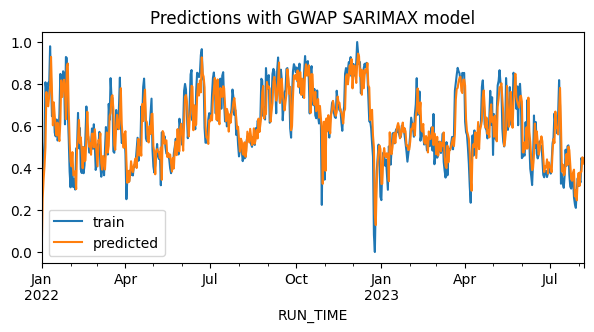

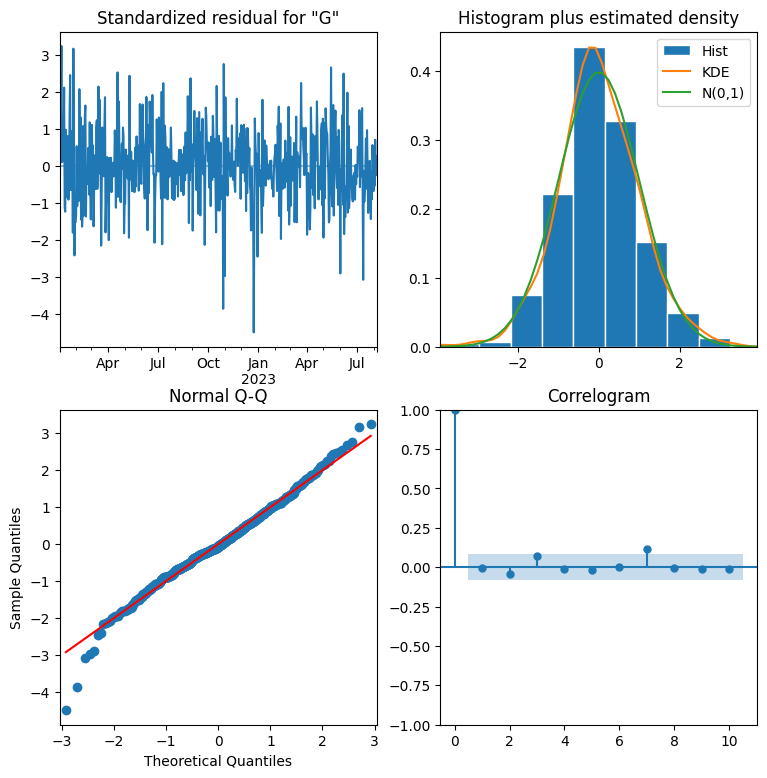

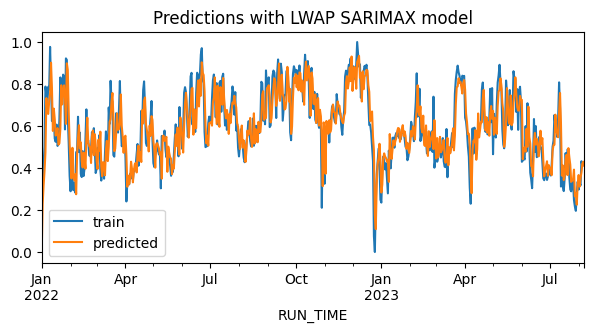

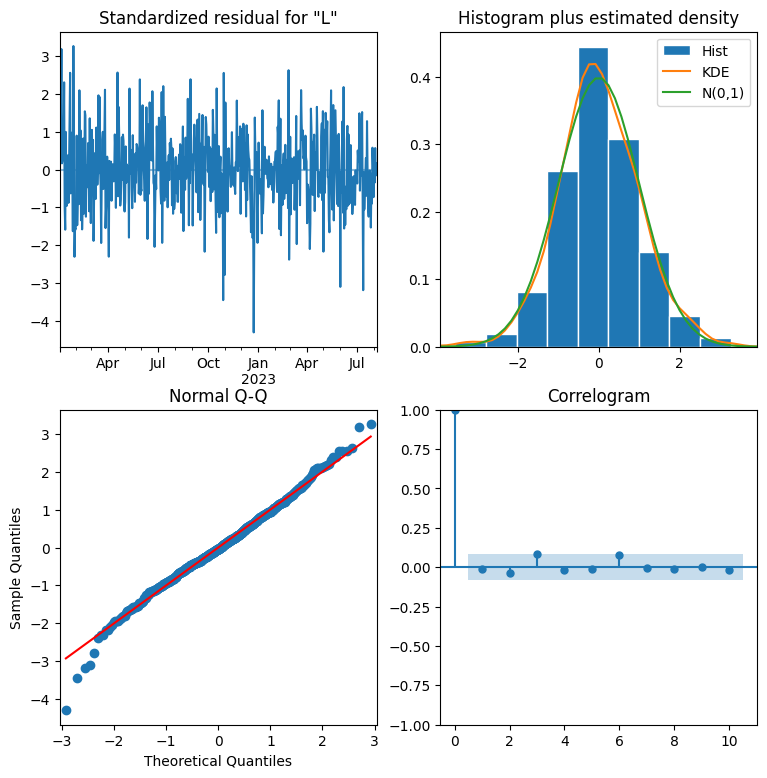

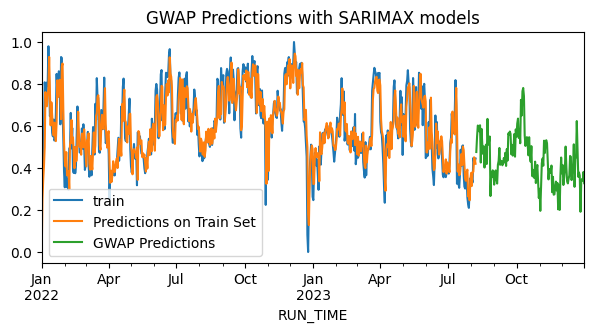

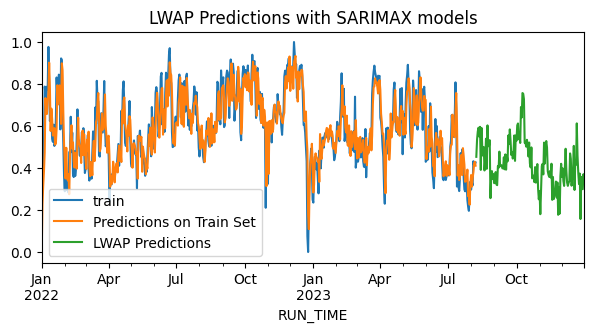

In [26]:
#Optimized orders for GWAP are (1,1,1)(0,0,1,6) and for LWAP are (1,1,1)(1,0,0)(7)
#This function fits the model and plots predictions on the train set; shows the summary of results and residuals diagnostics; and predicts on train set
%run SARIMAX.py

gwap_predictions, lwap_predictions, gwap_train_predict, lwap_train_predict = fit_SARIMAX(gwap_endog=GWAP_train, lwap_endog= LWAP_train, train_exog=diff_exog_train, gwap_order=(1,1,1), gwap_seasonal_order=(0,0,1,6), lwap_order = (1,1,1), lwap_seasonal_order=(1,0,0,7), GWAP_test=GWAP_test, LWAP_test=LWAP_test, exog_test = diff_exog_test)


Applying inverse transformations

In [32]:
%run transformscript.py
gwap_predictions = pd.DataFrame(gwap_predictions)
gwap_predictions = gwap_predictions.rename(columns={'predicted_mean':'GWAP'})
lwap_predictions = pd.DataFrame(lwap_predictions)
lwap_predictions = lwap_predictions.rename(columns={'predicted_mean':'LWAP'})
final_test = pd.concat([gwap_predictions, lwap_predictions, full_exog_test], axis=1)
inverse_test = inverse_transform_data(final_test, 'LUZ')

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



In [35]:
GWAP_predictions_inverse = inverse_test['GWAP']
LWAP_predictions_inverse = inverse_test['LWAP']

GWAP = complete_luzon_untransformed['GWAP']
LWAP = complete_luzon_untransformed['LWAP']


Mean Absolute Error (MAE) on Test Set for GWAP: 1079.814942661001
Root Mean Squared Error (RMSE) on Test Set for GWAP: 1782.2025482676859
Mean Absolute Percentage Error (MAPE) on Test Set for LWAP: 19.046106011267703


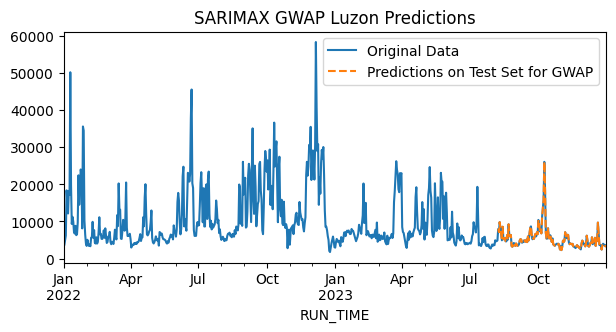

Mean Absolute Error (MAE) on Test Set for LWAP: 1192.2266420320982
Root Mean Squared Error (RMSE) on Test Set for LWAP: 1928.863326483337
Mean Absolute Percentage Error (MAPE) on Test Set for LWAP: 19.877454042026933


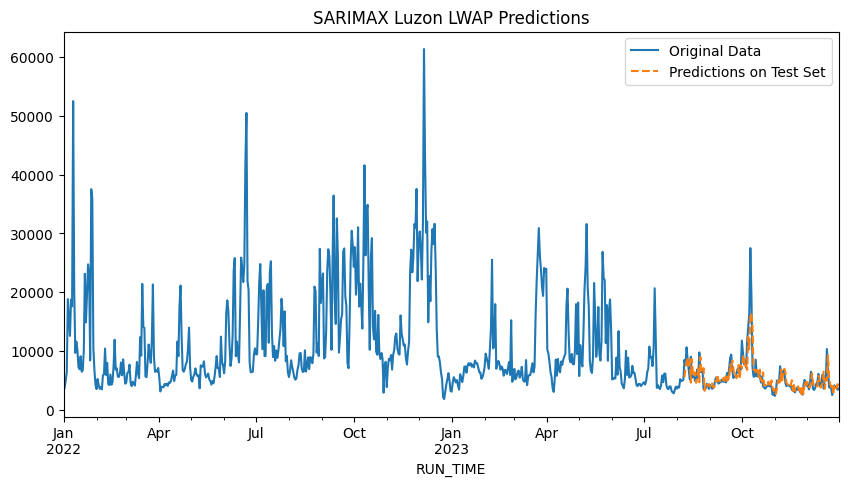

In [36]:
%run SARIMAX.py
evaluate_models(GWAP, LWAP, GWAP_predictions_inverse, untransformed_GWAP_test, untransformed_LWAP_test, LWAP_predictions_inverse, Region='Luzon')

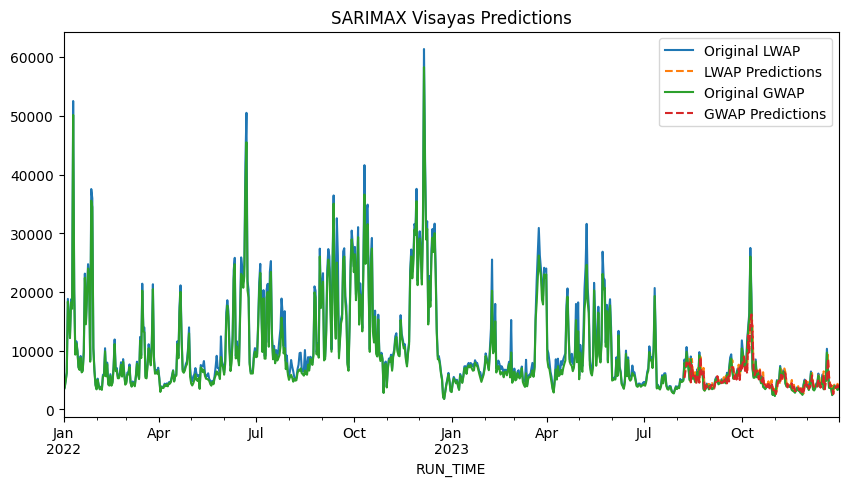

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
LWAP.plot(ax=ax, label='Original LWAP')
LWAP_predictions_inverse.plot(ax=ax, label='LWAP Predictions', linestyle='--')
GWAP.plot(ax=ax, label='Original GWAP')
GWAP_predictions_inverse.plot(ax=ax, label='GWAP Predictions', linestyle='--')
ax.set_title('SARIMAX Visayas Predictions')
ax.legend()
plt.show()

In [ ]:
GWAP_predictions_inverse.to_csv('vis-gwap-predictions.csv', index=False)
LWAP_predictions_inverse.to_csv('vis-lwap-predictions.csv', index=False)